# Similaridade Partidária

## Análise dos discursos parlamentares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lendo a base de dados
ano = '2019'
df = pd.read_csv('discursos/2019_discursos.csv', sep=";", encoding="utf-8")
df.head()

,Data,Sessão,Fase,Discurso,Hora,Publicação,NomeOrador,Partido,Estado,TextoDiscurso
0,01/01/2019,1.2019.N,NaN,TextoHTML.asp?etapa=5 &nuSessao=1.2019.N &nuQu...,15h16,DCN 02/01/2019 PAG. 7,JAIR MESSIAS BOLSONARO,NaN,NaN,O SR. JAIR MESSIAS BOLSONARO - Exmo. Sr. Pres...
1,01/01/2019,1.2019.N,NaN,TextoHTML.asp?etapa=5 &nuSessao=1.2019.N &nuQu...,15h08,DCN 02/01/2019 PAG. 6,JAIR MESSIAS BOLSONARO,NaN,NaN,O SR. JAIR MESSIAS BOLSONARO - Prometo manter...
2,01/01/2019,1.2019.N,NaN,TextoHTML.asp?etapa=5 &nuSessao=1.2019.N &nuQu...,15h08,DCN 02/01/2019 PAG. 6,HAMILTON MARTINS MOURÃO,NaN,NaN,O SR. HAMILTON MARTINS MOURÃO - Prometo mante...
3,27/02/2019,18.2019,ENCERRAMENTO,TextoHTML.asp?etapa=5 &nuSessao=18.2019 &nuQua...,16h16,DCD28/02/2019 PAG. 139,STEFANO AGUIAR,PSD,MG,DISCURSO NA ÍNTEGRA ENCAMINHADO PELO SR. DEPU...
4,27/02/2019,18.2019,ENCERRAMENTO,TextoHTML.asp?etapa=5 &nuSessao=18.2019 &nuQua...,16h16,DCD28/02/2019 PAG. 141,OTONI DE PAULA,PSC,RJ,DISCURSO NA ÍNTEGRA ENCAMINHADO PELO SR. DEPU...


## Pré-processamento

Dentre as etapas de aplicação de técnicas de Inteligência Artificial, o pré-processamento é uma das mais importantes para se obter um bom resultado. Esta é uma etapa fundamental que precede a realização de análises e aplicação de algoritmos de aprendizagem de máquinas.

<p>Conforme Art. 65 do Regimento Interno da Câmara dos Deputados, as sessões realizadas em Plenário são classificadas como: <br />
I - preparatórias;<br />
II - deliberativas;<br />
III - não deliberativas.</p>

Para a presente pesquisa, serão utilizados os discursos referente ao Grande Expediente, realizados nas sessões deliberativas: <br />
- Grande Expediente, a iniciar-se às dez ou às quinze horas, conforme o caso, com duração improrrogável de cinquenta minutos, distribuída entre os oradores inscritos; <br />

In [3]:
# Removendo as fases ABERTURA, BREVES COMUNICAÇÕES, ORDEM DO DIA, HOMENAGEM e ENCERRAMENTO
df = df.query("Fase in ['GRANDE EXPEDIENTE ']")
df.shape

(996, 10)

In [4]:
# Removendo valores nulos
a = df.shape[0]
df = df.dropna()
b = df.shape[0]
print ("Removidas", (a - b), "linhas")

Removidas 0 linhas


In [5]:
# Removendo valores duplicados
a = df.shape[0]
df = df.drop_duplicates(['Discurso'])
b = df.shape[0]
print ("Removidas", (a - b), "linhas")

Removidas 0 linhas


In [6]:
# Removendo discursos de não parlamentares devido a não haver conexão com partidos 
df = df.query('Partido != "-" & Partido != "S.PART." & Partido!= "SEM PARTIDO"')
print("A base de dados apresenta {} registros e {} variáveis".format(df.shape[0], df.shape[1]))

A base de dados apresenta 996 registros e 10 variáveis


Diante da crise política de 2014, vários partidos mudaram de nome, símbolo e ideologia, tanto para atrair eleitores para as eleições de 2018, como também para se esquivar dos casos de corrupção envolvendo políticos desses partidos. Os nomes foram alterados, em muitos casos, para slogans, em vez de siglas. Também caiu a palavra "partido" em alguns casos de renomeação.

In [7]:
# Ajustando siglas de partidos
df['Partido'] = df['Partido'].replace(['PTN', 'PODEMOS'], 'PODE')
df['Partido'] = df['Partido'].replace(['PTDOB'], 'AVANTE')
df['Partido'] = df['Partido'].replace(['PEN', 'PATRIOTA'], 'PATRI')
df['Partido'] = df['Partido'].replace(['PFL'], 'DEM')
df['Partido'] = df['Partido'].replace(['PMDB'], 'MDB')
df['Partido'] = df['Partido'].replace(['PSDC'], 'DC')
df['Partido'] = df['Partido'].replace(['PR'], 'PL')
df['Partido'] = df['Partido'].replace(['PMR', 'PBR'], 'REPUBLICANOS')
df['Partido'] = df['Partido'].replace(['PPS'], 'CIDADANIA')
df['Partido'] = df['Partido'].replace(['SOLIDARIEDAD'], 'SOLIDARIEDADE')

Selecionando apenas discursos a qual o partido possui representantes pelo menos dois representantes na Câmara

In [8]:
# Retirados partidos sem representantes ou com apenas um representantes na Câmara 
if(ano == '2010'):
    partidos_com_representantes = ['PT', 'PP', 'CIDADANIA', 'PCDOB', 'PMN', 'MDB', 'DEM', 'PSB', 'PDT', 'PTB', 'PL', 'PSDB', 'PV', 'PSC', 
                 'PAN', 'PTC', 'PHS', 'PSOL', 'PRONA'] # Retirado PTDOB E PRB por terem somente um representante
elif(ano in ['2011', '2012', '2013', '2014']):
    partidos_com_representantes = ['PT', 'MDB', 'PL', 'PSB', 'PDT', 'PSC', 'PCDOB', 'REPUBLICANOS', 'PODE', 'PSDB', 'DEM', 'PTB', 'CIDADANIA', 
                 'PMN', 'AVANTE', 'PP', 'PV', 'PSOL', 'PHS', 'PRTB', 'PRP'] # Retirado PTC e PSL por terem somente um representante
elif(ano in ['2015', '2016', '2017', '2018']):
    partidos_com_representantes = ['PT', 'MDB', 'PL', 'PDT', 'REPUBLICANOS', 'PROS', 'PSD', 'PP', 'PSDB', 'DEM', 'PTB', 'PMN', 'SD', 'PTC', 'PODE', 
                'PATRI', 'PSB', 'PRP', 'CIDADANIA', 'PHS', 'PV', 'PSOL', 'PSC', 'DC', 'PCDOB'] # Retirado PCdoB, PRTB e PSL por terem somente um representante
elif(ano == '2019'):
    partidos_com_representantes = ['PT', 'PSL', 'PP', 'MDB', 'PSD', 'PL', 'PSB', 'PRB', 'PSDB', 'DEM', 'PDT', 'SD', 'PODE', 'PTB', 'PSOL', 
                'PCDOB', 'PSC', 'PROS', 'CIDADANIA', 'NOVO', 'AVANTE', 'PHS', 'PATRI', 'PV', 'PRP', 'PMN', 'PTC'] # Retirados DC, PPL e REDE por terem somente um representante


In [9]:
df = df.loc[df['Partido'].isin(partidos_com_representantes)]
print("A base de dados apresenta {} registros e {} variáveis".format(df.shape[0], df.shape[1]))

A base de dados apresenta 961 registros e 10 variáveis


<h4>Normalização</h4>
<p>
Para a normalização do corpus, foram utilizadas as seguintes técnicas: <br />
• reescrita do texto adotando apenas letras minúsculas ou maiúsculas. Nesta pesquisa optou-se pela escrita com letras minúsculas;<br />
• remoção de números;<br />
• remoção de acentuação;<br />
• remoção de caracteres especiais;<br />
• remoção de pontuação;
</p>

In [10]:
import nltk 
from nltk import tokenize
from unidecode import unidecode
from unicodedata import normalize
import unicodedata
import re
from nltk.stem import RSLPStemmer
from pandasql import sqldf
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [11]:
# Converte texto para minúsculo e remove números e caracteres especiais
def converteMinusculo(corpus):
    #converte todas as letras para minúsculo 
    corpus = corpus.apply(lambda x: x.lower())
    #remove números e caracteres especiais 
    corpus = corpus.apply(lambda x: re.sub('[0-9]|_|\"|%|;|!|\?|,|\.|/|$|\(|\)|-|\+|:|•', ' ', x))
    return corpus

In [12]:
# Removendo acentuação
from unidecode import unidecode
def removeAcentos(corpus):
    corpus = corpus.apply(lambda x: unidecode(x))
#    corpus = corpus.apply(lambda x: re.sub(u'[^a-zA-Z0-9: ]', '', x.encode().decode('utf-8')))
    return corpus


<h4>Stop words</h4>
<p>
Stop words (ou palavras de parada – tradução livre) são palavras que podem ser consideradas irrelevantes para o conjunto de resultados a ser exibido em uma busca realizada em uma search engine.<br />
Esse processo faz parte do pré-processamento de dados realizado nas etapas iniciais de um pipeline de PLN. Quando devemos montar um Bag-of-words, por exemplo, a maior frequência de palavras serão stopwords. Pois estas palavras são utilizadas o tempo todo para dar sentido ao texto. Portanto, remover stopwords reduz o ruído dos dados analisados.
</p>

In [13]:
# Removendo StopWords
def stopWords(descricao):

    token_espaco = tokenize.WhitespaceTokenizer()
    palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
    # Retirar também letras soltas e as siglas dos estados brasileiros
    palavras_irrelevantes2 = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','w','z','sr','sra','bloco','ordem','revisao','orador',
                              'ac','al','ap','am','ba','ce','df','es','go','ma','mt','ms','mg','pa','pb','pr','pe','pi','rr','ro','rj','rn','rs','sc','sp','se','to']

# como foi retirado os acentos da base, também é necessário retirar das StopWords
    palavras_irrelevantes = [unidecode(texto) for texto in palavras_irrelevantes]

    frase_processada = []
    for word in descricao:
        nova_frase = []
        palavras_texto = token_espaco.tokenize(word)
        for palavra in palavras_texto:
            if palavra not in palavras_irrelevantes:
                if palavra not in palavras_irrelevantes2:
                    nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    return frase_processada


Pesquisa o nome dos deputados para remover do texto

In [14]:
import json, requests 
import xml.etree.ElementTree as ET
from nltk.tokenize import word_tokenize

def getDeputados():
    import unidecode
    url_deputados = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"
    response = requests.get(url_deputados)
    dados_req = response.content
    nome = []
    obj = json.loads(dados_req)
    for dado in obj['dados']:
        nome.append(dado['nome'])
    nomeParlamentar = []
    tokenized = [word_tokenize(i) for i in nome]
    for x in tokenized:
        for y in x:
            if(y not in ['Professor', 'Professora', 'Pastor', 'Pastora', 'Delegado', 'Policial', 'Sargento']):
                #nm_dpt = re.sub(u'[^a-zA-Z0-9: ]', '', y.encode().decode('utf-8'))
                nm_dpt = unidecode.unidecode(y)
                nomeParlamentar.append(nm_dpt.lower())
    return nomeParlamentar

Nesta etapa, foram removidos dos discursos os nomes dos parlamentares e partidos para não enviesar a análise.

In [15]:
# Retira palavras desnecessárias
def retiraPalavras(descricao):
    token_espaco = tokenize.WhitespaceTokenizer()
    parlamentares = getDeputados()
    partidos = []
    for i in partidos_com_representantes:
        partidos.append(i.lower())
    
    frase_processada = []
    for word in descricao:
        nova_frase = []
        palavras_texto = token_espaco.tokenize(word)
        for palavra in palavras_texto:
            if palavra not in partidos:
                if palavra not in parlamentares:
                    nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    return frase_processada

<h4>Stemmer </h4>
<p>
O processo de stemização (do inglês, stemming) consiste em reduzir uma palavra ao seu radical. <br />
Este é um recurso já conhecido na área da linguística que foi aplicado para ajudar no processamento de dados. <br />
Observe o exemplo:<br />
Falando, falar, falamos, falais, falam, falei, falarão <br />
Todos estas palavras podem ser reduzidas ao radical fala;
</p>

In [16]:
# Tratando com Stemmer
def retornaStemmer(descricao):

    token_espaco = tokenize.WhitespaceTokenizer()
    stemmer = RSLPStemmer()

    frase_processada = []
    for word in descricao:
        nova_frase = []
        palavras_texto = token_espaco.tokenize(word)
        for palavra in palavras_texto:
            nova_frase.append(stemmer.stem(palavra.lower()))
        frase_processada.append(' '.join(nova_frase))
    return frase_processada

In [17]:
# Reescrevendo em minúsculo e removendo números e caracteres especiais
df["TextoDiscurso"] = converteMinusculo(df["TextoDiscurso"])
print("Convertido texto para minúsculo")
print("Removido caracteres especiais")

# Removendo acentuação
df['TextoDiscurso'] = removeAcentos(df['TextoDiscurso'])
print("Removido acentuação")

# Removendo StopWorlds
df["TextoDiscurso"] = stopWords(df['TextoDiscurso'])
print("Removido stopwords")

# Removendo palavras desnecessárias
df["TextoDiscurso"] = retiraPalavras(df['TextoDiscurso'])
print("Removidas stopwords adicionais")


Convertido texto para minúsculo
Removido caracteres especiais
Removido acentuação
Removido stopwords
Removidas stopwords adicionais


In [18]:
df.head()

,Data,Sessão,Fase,Discurso,Hora,Publicação,NomeOrador,Partido,Estado,TextoDiscurso
220,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h44,DCD27/02/2019 PAG. 88,FÁBIO TRAD,PSD,MS,presidente projeto resolucao autoria quero agr...
221,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 86,SILVIO COSTA FILHO,PRB,PE,questao presidente quero fazer apelo exa basea...
222,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 87,POMPEO DE MATTOS,PDT,RS,presidente quero advertir casa contribuinte ve...
223,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 86,JULIO CESAR RIBEIRO,PRB,DF,presidente quero dizer tristeza revolta relaca...
224,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h36,DCD27/02/2019 PAG. 85,ÁTILA LIRA,PSB,PI,presidente sras srs parlamentares quero regist...


In [19]:
print("A base de dados apresenta {} registros e {} variáveis".format(df.shape[0], df.shape[1]))

A base de dados apresenta 961 registros e 10 variáveis


## Exploratory Data Analysis (EDA)

<p>Exploratory Data Analysis (EDA) que significa Análise Exploratória de Dados é definido como uma abordagem para a exploração minuciosa dos dados que se deseja analisar.</p>
<p>A análise parte desde a exploração descritiva dos dados como quantidade de registros e valores faltantes até uma exploração visual com o objetivo de representar melhor os dados em formatos mais intuitivos.</p>
<p>Para realizar o EDA normalmente se utilizam técnicas estatísticas como medir a dispersão dos dados, verificação de dependência entre atributos, detecção de anomalias, entre outras.</p>
<p>Visualizar corretamente os dados é de extrema importância durante a Análise Exploratória, pois permite o Cientista de Dados representar a informação em um modelo visual mais fácil e intuitivo facilitando a interpretação.</p>

In [20]:
# Contagem dos dados por atributo partido
df.groupby('Partido').count()

,Data,Sessão,Fase,Discurso,Hora,Publicação,NomeOrador,Estado,TextoDiscurso
Partido,,,,,,,,,
AVANTE,8,8,8,8,8,8,8,8,8
CIDADANIA,18,18,18,18,18,18,18,18,18
DEM,22,22,22,22,22,22,22,22,22
MDB,33,33,33,33,33,33,33,33,33
NOVO,14,14,14,14,14,14,14,14,14
PATRI,2,2,2,2,2,2,2,2,2
PCDOB,38,38,38,38,38,38,38,38,38
PDT,41,41,41,41,41,41,41,41,41
PL,29,29,29,29,29,29,29,29,29


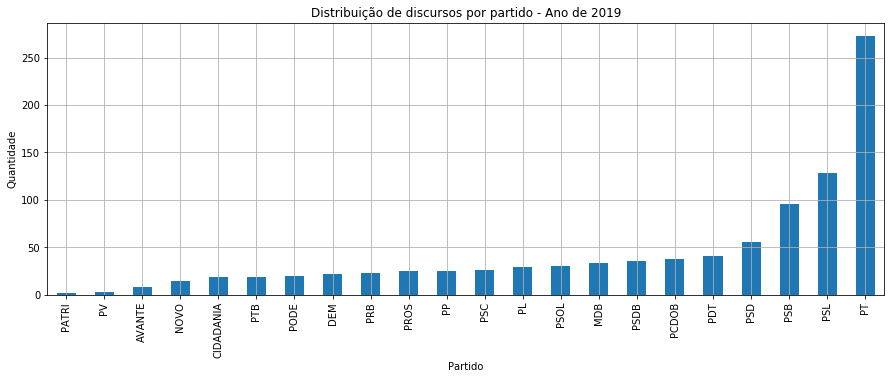

In [21]:
disc_por_partido = df.groupby('Partido').count().Discurso
disc_por_partido.sort_values(ascending=True).plot(kind='bar', figsize=(15,5), grid=True, rot=90)#, color='darkblue')

plt.title('Distribuição de discursos por partido - Ano de '+ ano)
#plt.xlabel('Partido Político')
plt.ylabel('Quantidade')
plt.show()

PT


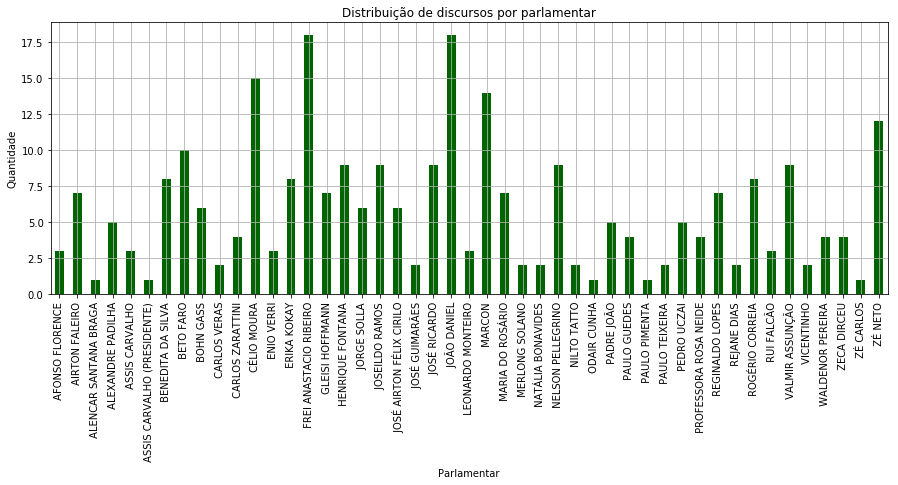

PSL


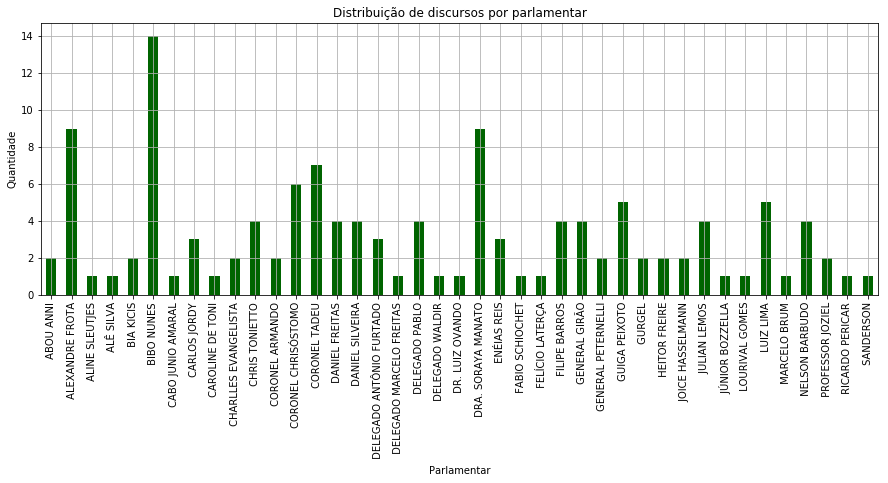

PP


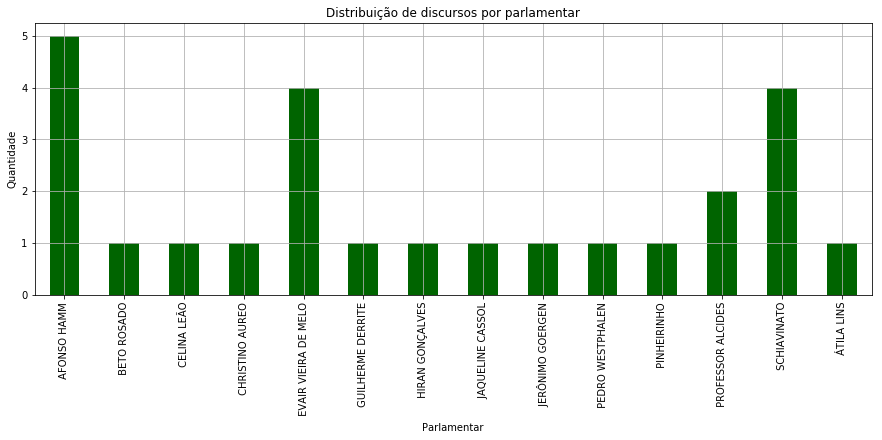

MDB


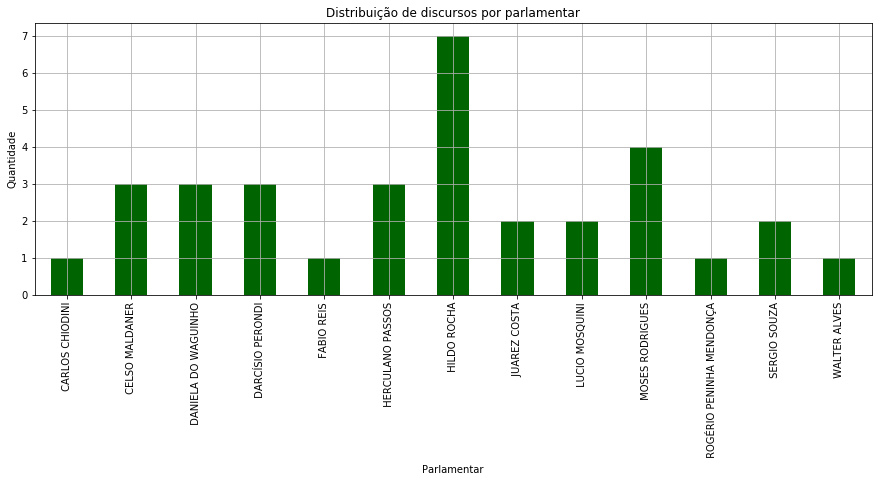

PSD


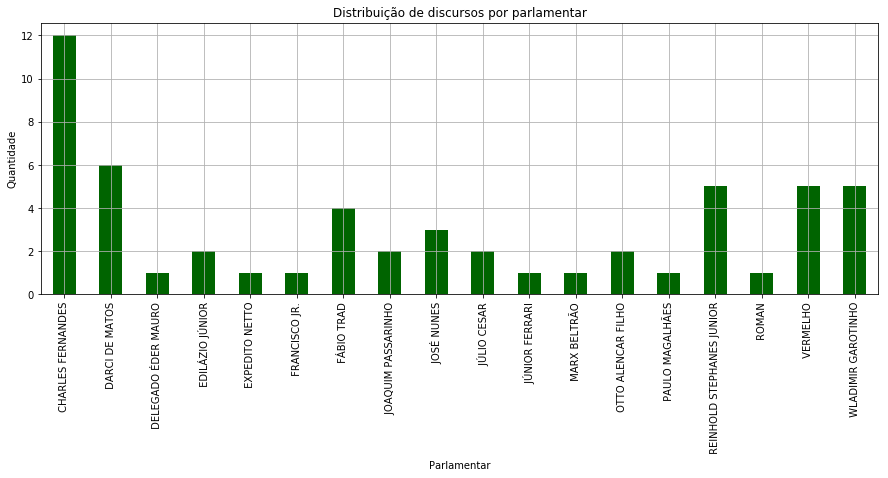

PL


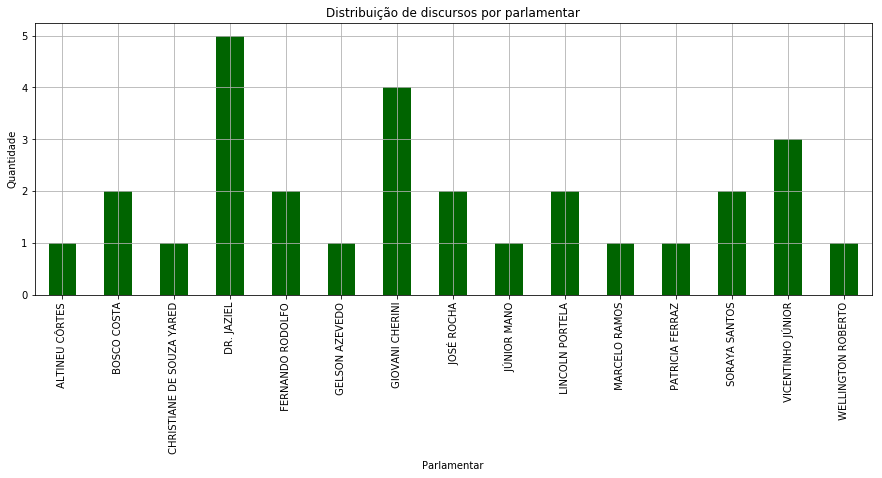

PSB


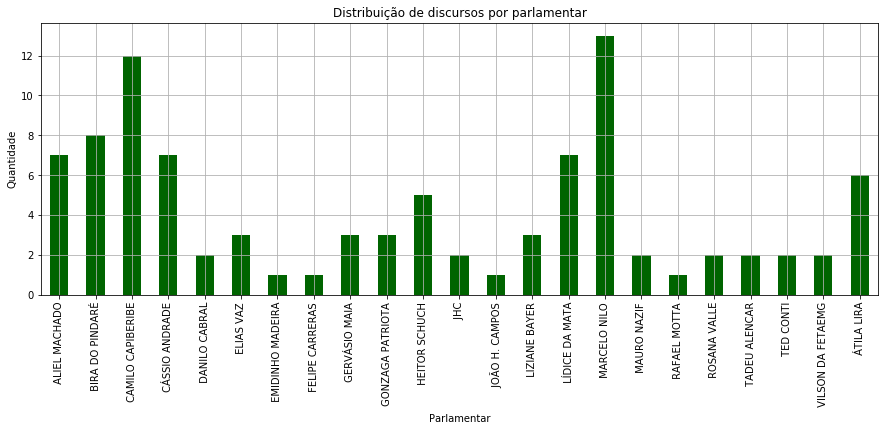

PRB


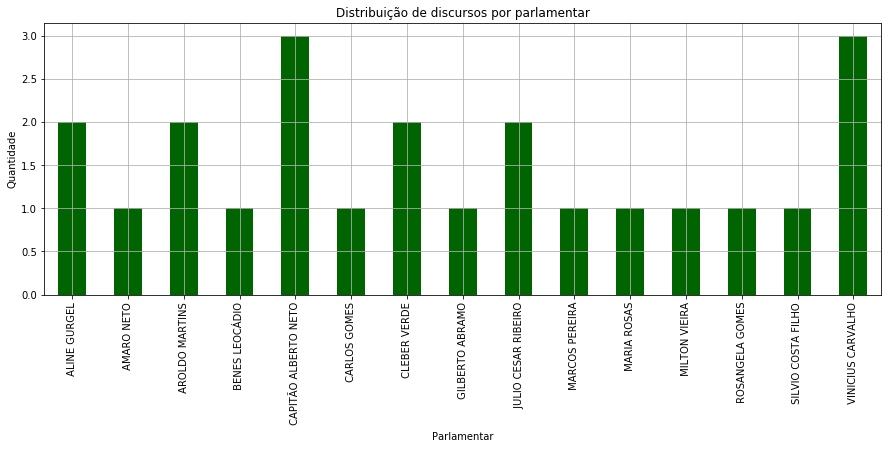

PSDB


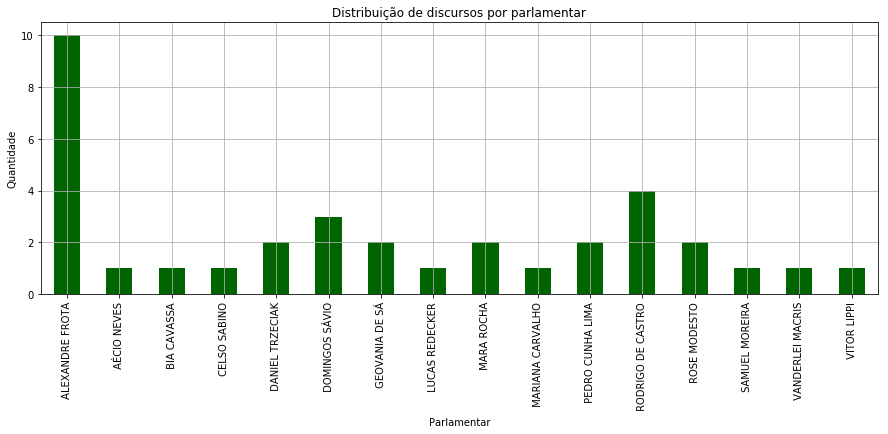

DEM


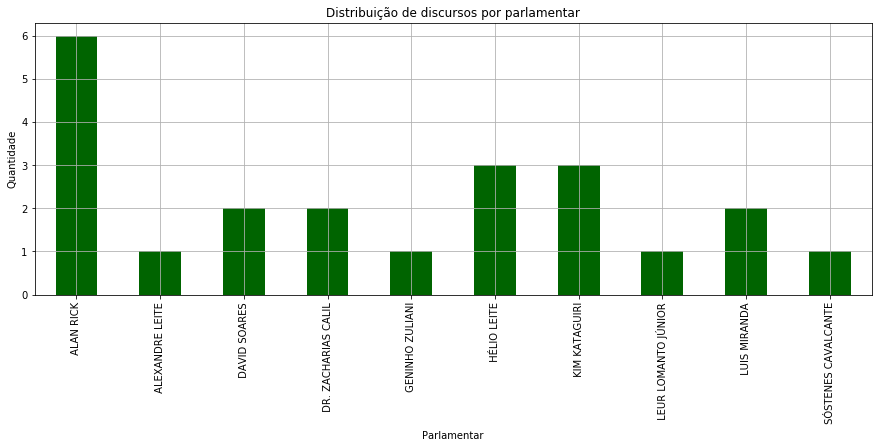

PDT


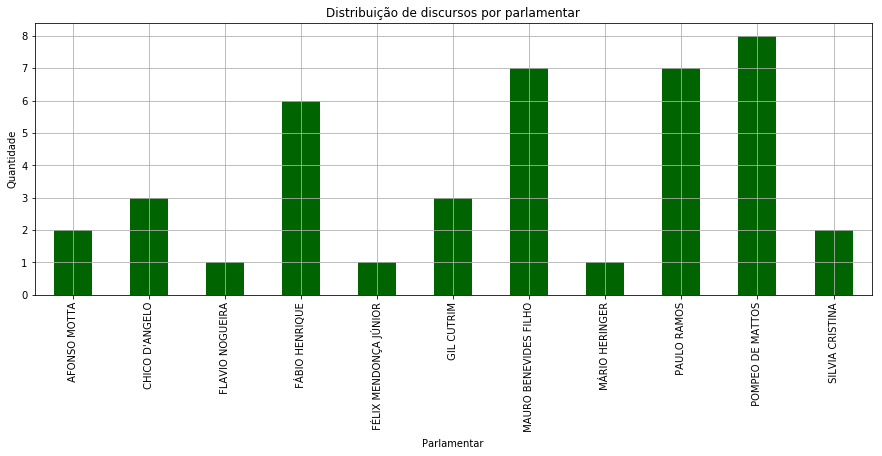

PODE


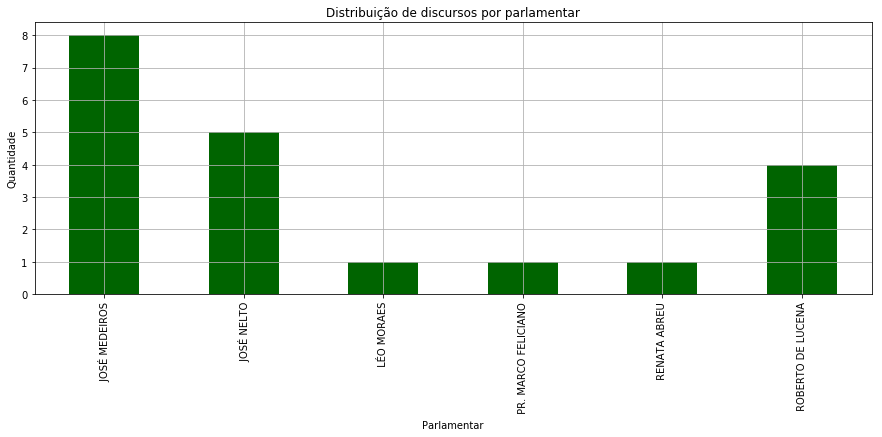

PTB


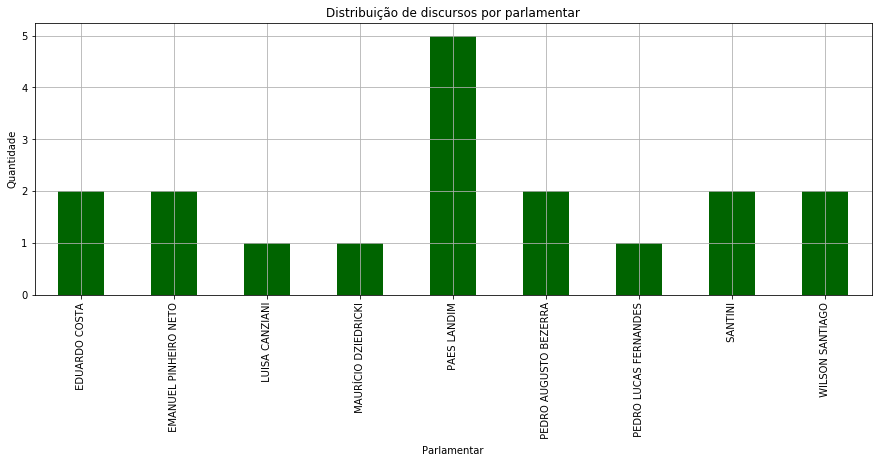

PSOL


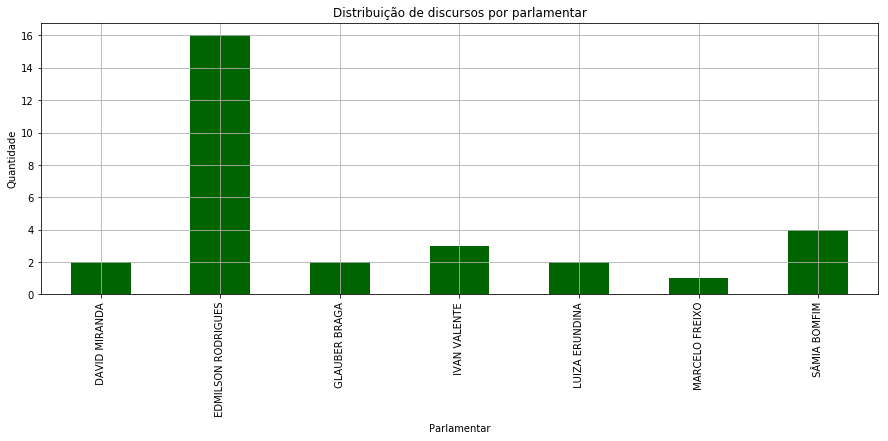

PCDOB


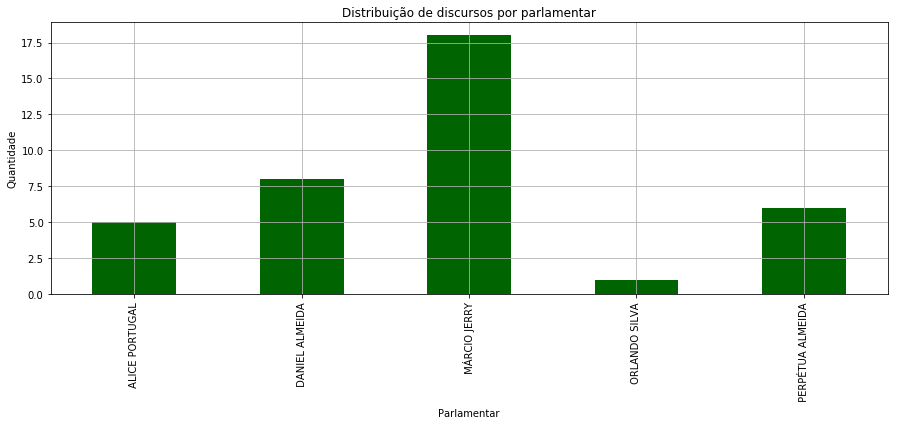

PSC


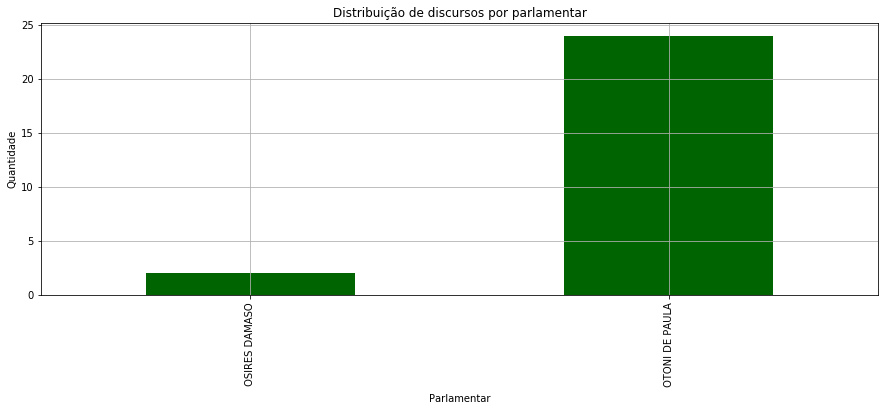

PROS


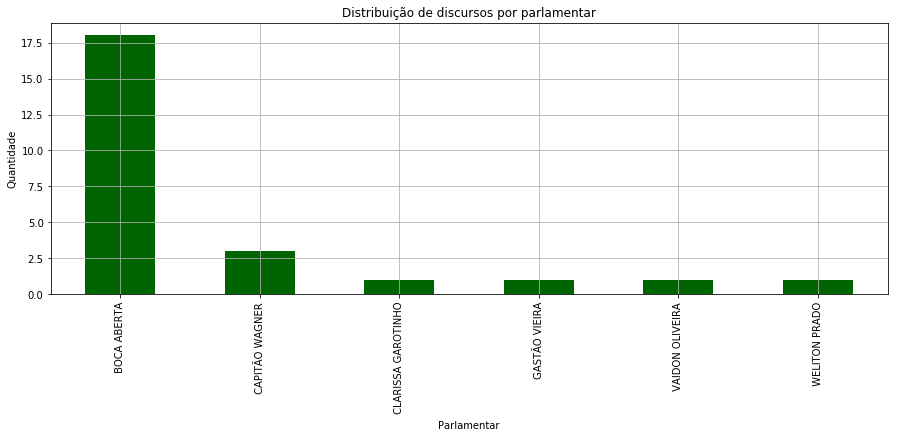

CIDADANIA


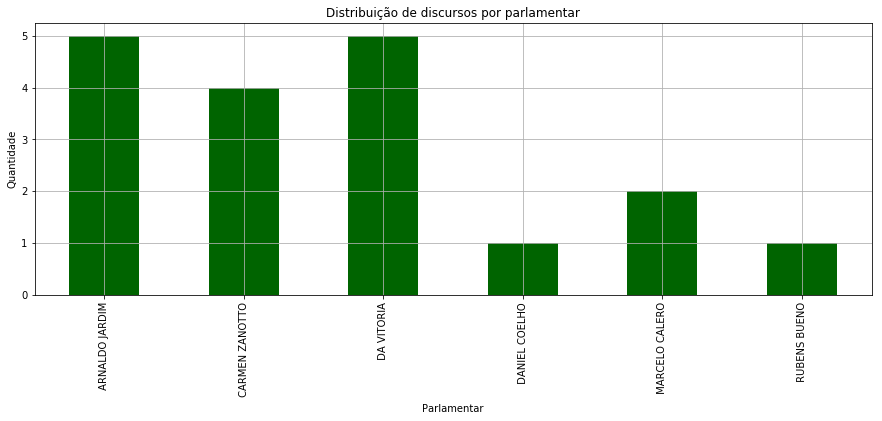

NOVO


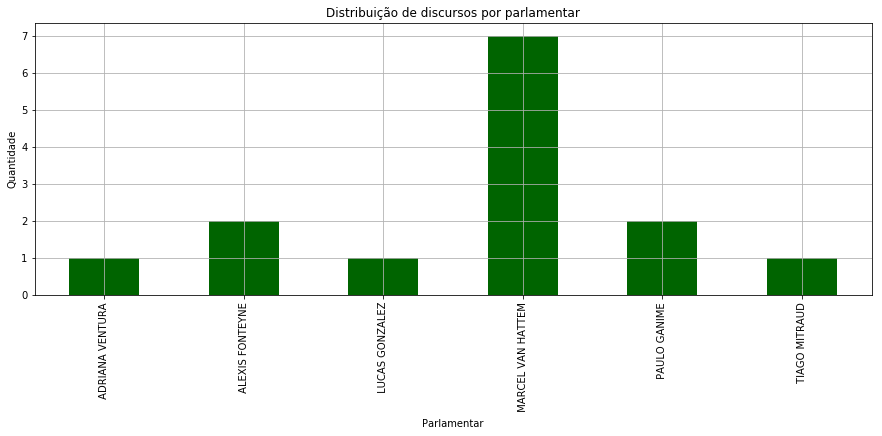

AVANTE


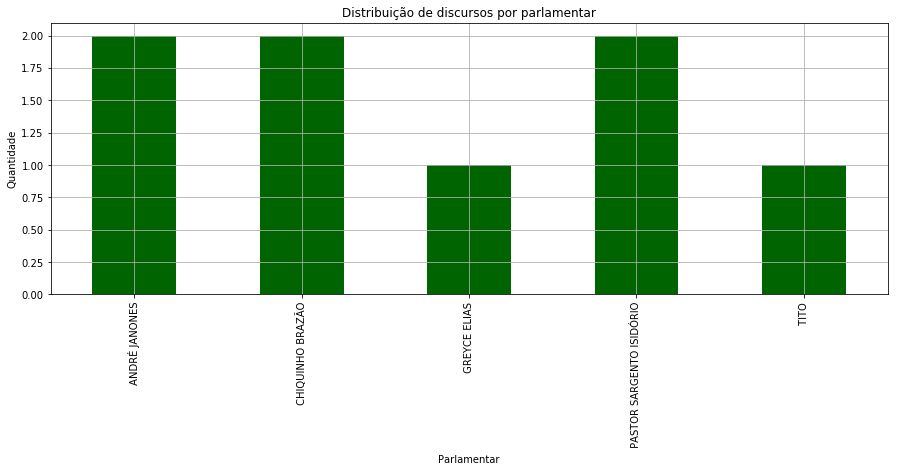

PATRI


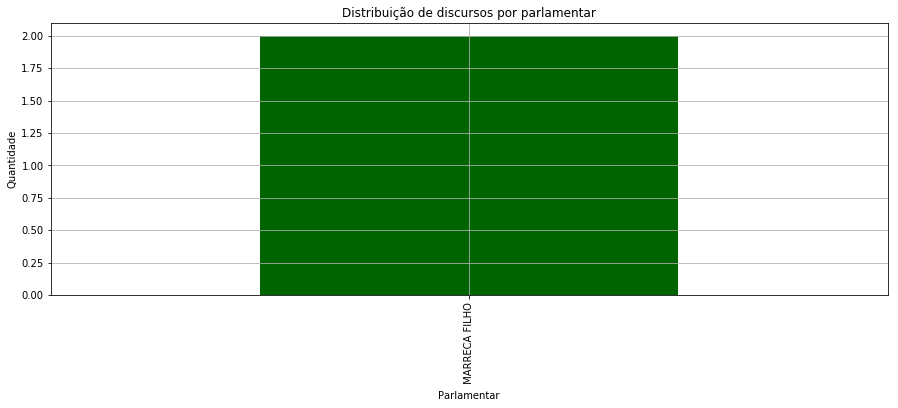

PV


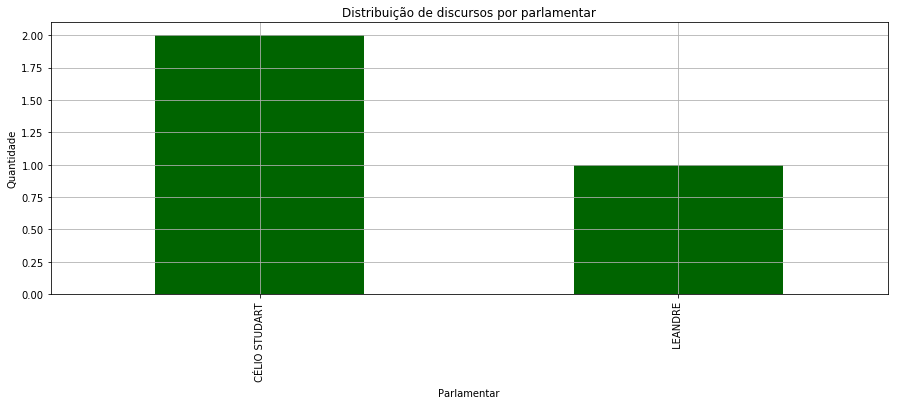

In [22]:
for i in partidos_com_representantes:
    dpp = df.query("Partido in ['"+i+"']")
    if(dpp.shape[0] > 0):
        print(i)
        disc_por_parlamentar = dpp.groupby('NomeOrador').count().Discurso
        disc_por_parlamentar.plot(kind='bar', figsize=(15,5), grid=True, rot=90, color='darkgreen')
        plt.title('Distribuição de discursos por parlamentar')
        plt.xlabel('Parlamentar')
        plt.ylabel('Quantidade')
        plt.show()

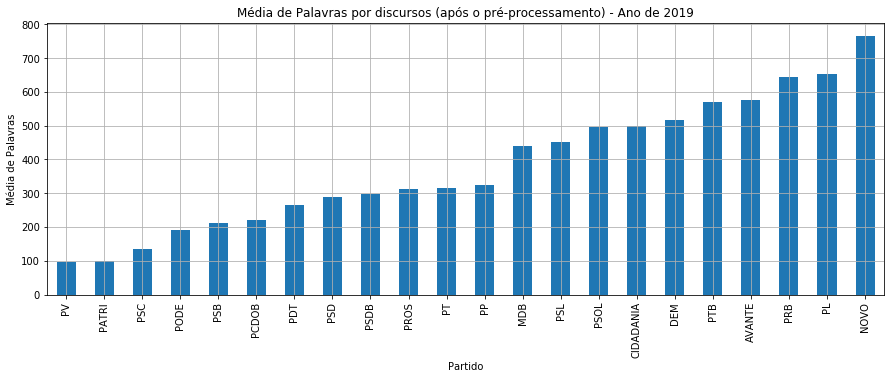

In [23]:
token_espaco = tokenize.WhitespaceTokenizer()
qtd_words = []
part_words = []
for frase, partido in zip(df['TextoDiscurso'].tolist(), df['Partido']):
    palavras_texto = token_espaco.tokenize(frase)
    part_words.append(partido)
    qtd_words.append(len(palavras_texto))

df_qtd_words = pd.DataFrame()
df_qtd_words['Partido'] = part_words
df_qtd_words['Qtd'] = qtd_words
media_palavras = df_qtd_words.groupby(["Partido"]).mean()["Qtd"]
media_palavras.sort_values(ascending=True).plot(kind='bar', figsize=(15,5), grid=True, rot=90)
plt.title('Média de Palavras por discursos (após o pré-processamento) - Ano de '+ ano)
#plt.xlabel('Partido')
plt.ylabel('Média de Palavras')
plt.show()

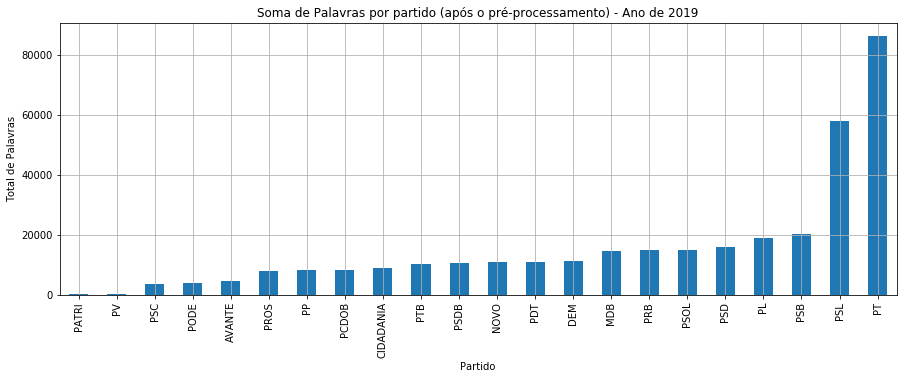

In [24]:
soma_palavras = df_qtd_words.groupby(["Partido"]).sum()["Qtd"]
soma_palavras.sort_values(ascending=True).plot(kind='bar', figsize=(15,5), grid=True, rot=90)
plt.title('Soma de Palavras por partido (após o pré-processamento) - Ano de '+ ano)
#plt.xlabel('Partido')
plt.ylabel('Total de Palavras')
plt.show()

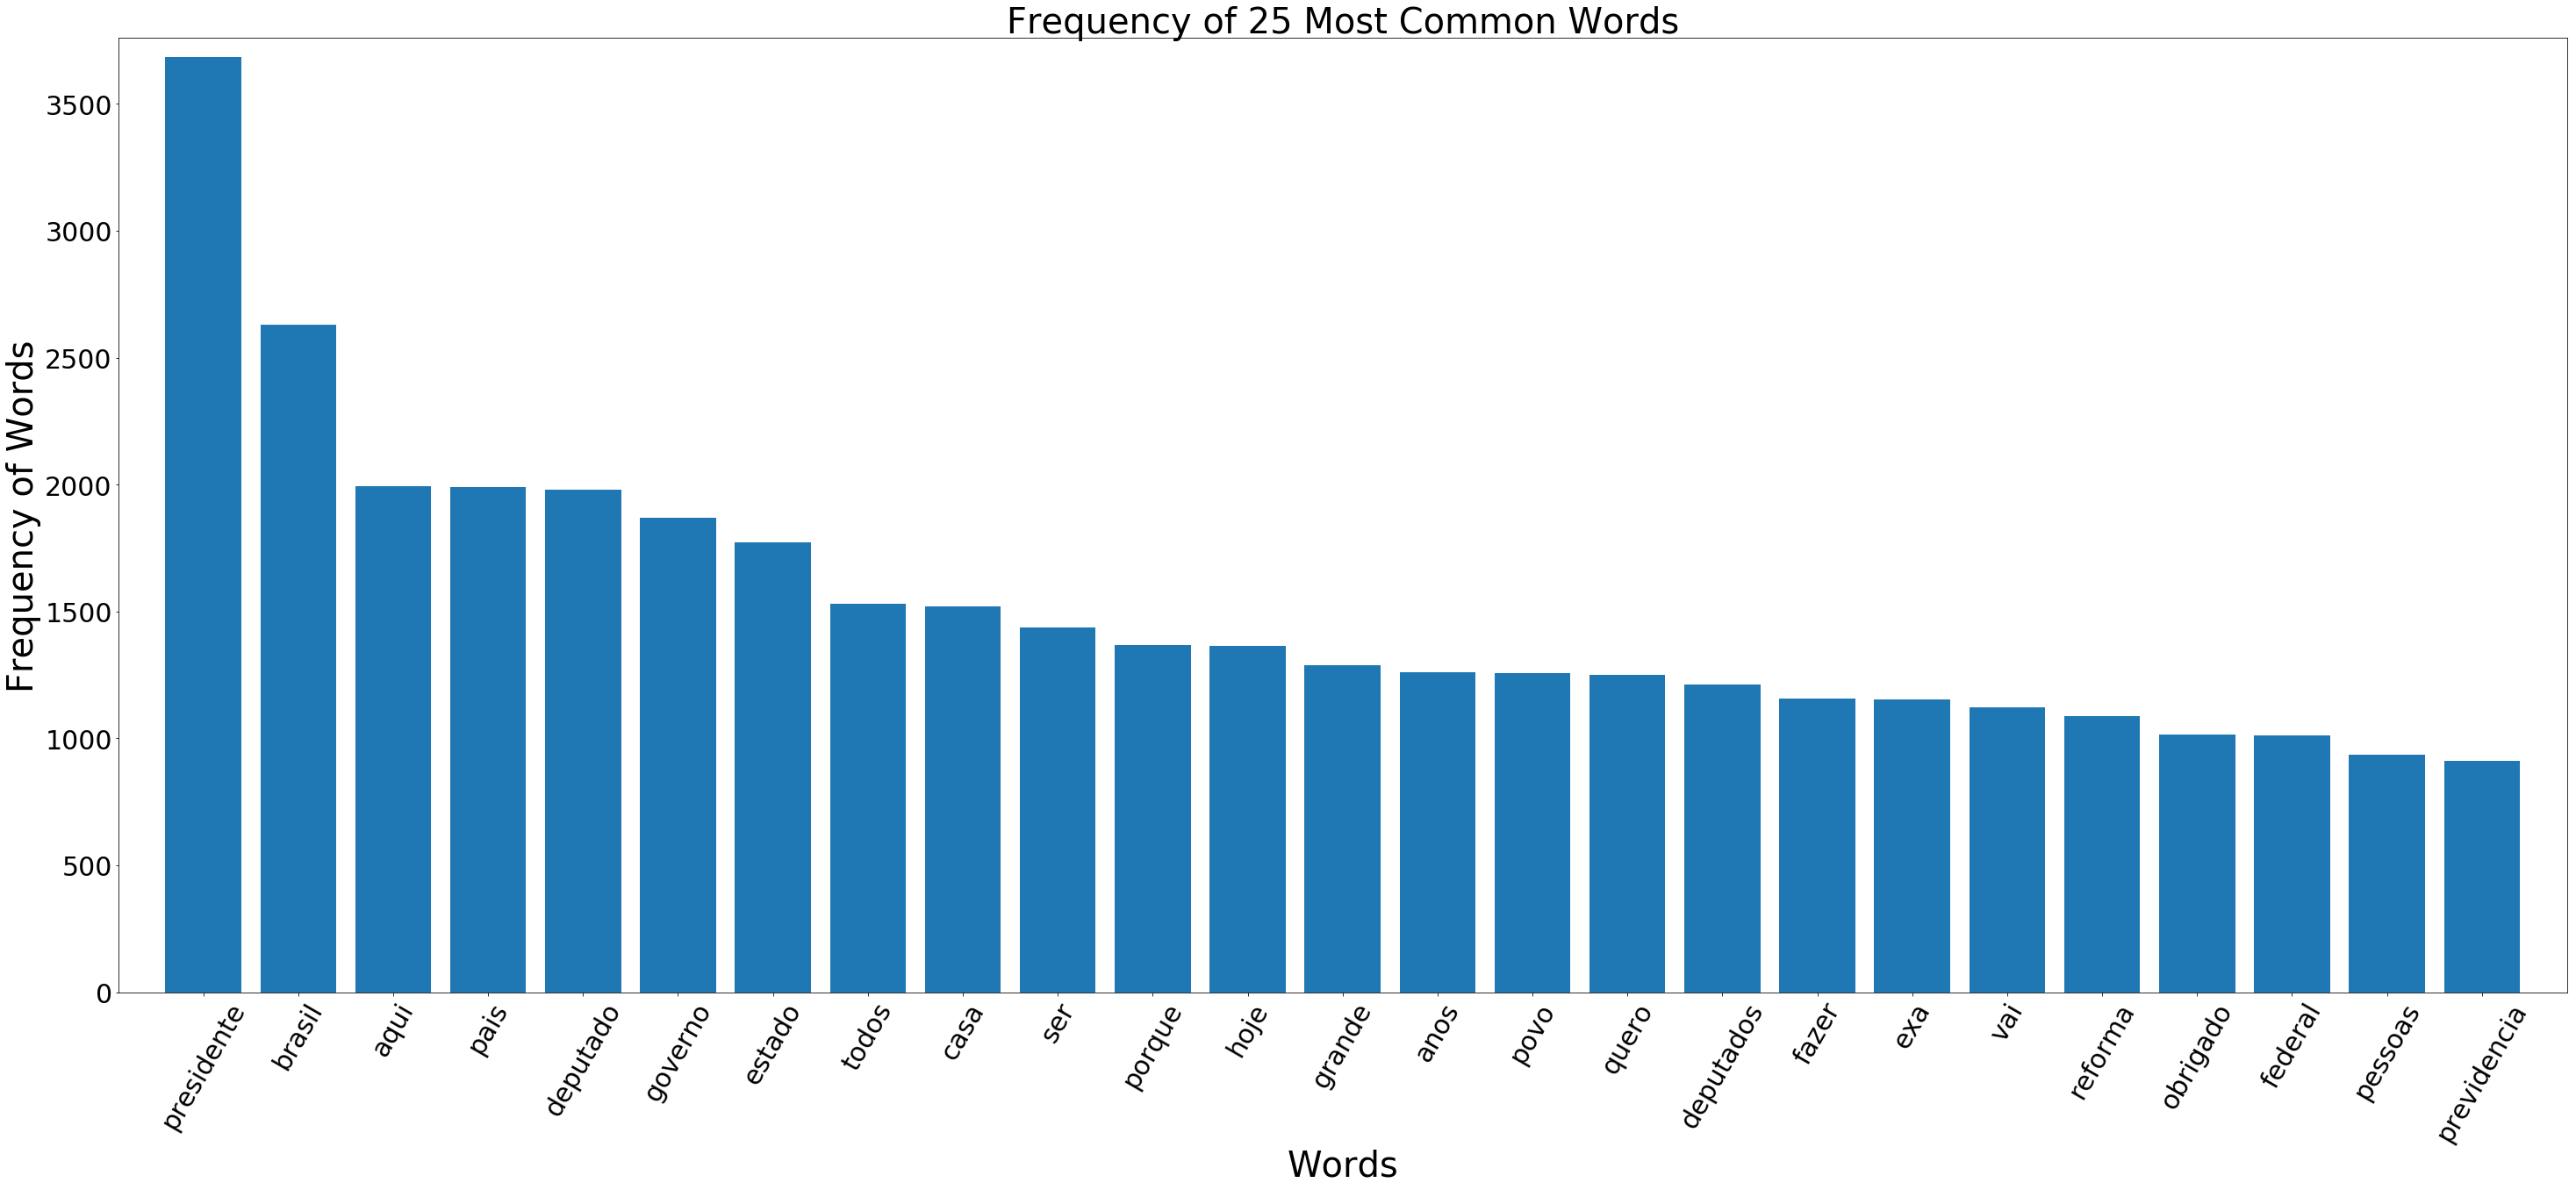

In [25]:
token_espaco = tokenize.WhitespaceTokenizer()
allwords = []
for frase in df['TextoDiscurso'].tolist():
    palavras_texto = token_espaco.tokenize(frase)
    for palavra in palavras_texto:
        allwords.append(palavra)
from nltk.probability import FreqDist
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,20))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=40)
plt.ylabel('Frequency of Words', fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(rotation=60, fontsize=30)
plt.title('Frequency of 25 Most Common Words', fontsize=40)
plt.show()

<h4>Nuvem de Palavras</h4>
<p>
Uma <b>nuvem de palavras</b> mostra as palavras mais comuns e importantes de um texto. <br />O tamanho e estilo de cada palavra é influênciada pela quantidade de ocorrências no texto. <br />A nuvem de palavras é uma importante forma de visualização de dados textuais que auxilia na identificação de termos mais relevantes da pesquisa.
</p>

In [26]:
#!pip install wordcloud
%matplotlib inline
from wordcloud import WordCloud

import matplotlib.pyplot as plt

def nuvemPalavras(df):
    todas_palavras = ' '.join([texto for texto in df.TextoDiscurso])
    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 100,
                              background_color='white',
                              colormap='plasma',
                              collocations = False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

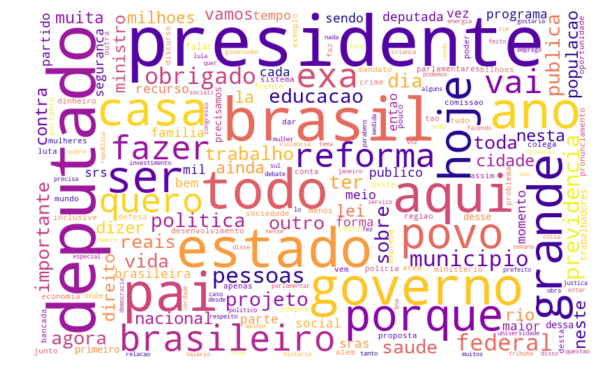

In [27]:
# Plotando Núvem de Palavras após pré-processamento
nuvemPalavras(df)

In [28]:
from pandasql import sqldf
def getQuery(q):
    sqldf_words = lambda q: sqldf(q, globals())
    return sqldf_words(q)

In [29]:
# Verificando a possibilidade de permanência de discursos sem valores
a = df.shape[0]
df = df.query("TextoDiscurso != ''")
b = df.shape[0]
print ("Removidas", (a - b), "linhas")

Removidas 5 linhas


In [30]:
#df.to_csv('discursos/preprocessados/pequeno_grande_expediente_2019_pre_processado.csv', sep=';', index=False)

In [31]:
# Removendo Steemer
df["TextoDiscurso"] = retornaStemmer(df['TextoDiscurso'])
df.head()

,Data,Sessão,Fase,Discurso,Hora,Publicação,NomeOrador,Partido,Estado,TextoDiscurso
220,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h44,DCD27/02/2019 PAG. 88,FÁBIO TRAD,PSD,MS,presid projet resoluca autor quer agradec tod ...
221,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 86,SILVIO COSTA FILHO,PRB,PE,questa presid quer faz apel exa base art incis...
222,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 87,POMPEO DE MATTOS,PDT,RS,presid quer advert cas contribuint vez aprov r...
223,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 86,JULIO CESAR RIBEIRO,PRB,DF,presid quer diz trist revolt relaca ministr ed...
224,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h36,DCD27/02/2019 PAG. 85,ÁTILA LIRA,PSB,PI,presid sra sr parlament quer registr aqu desap...


In [32]:
# Verificando a possibilidade de permanência de discursos sem valores
a = df.shape[0]
df = df.query("TextoDiscurso != ''")
b = df.shape[0]
print ("Removidas", (a - b), "linhas")

Removidas 0 linhas


Removendo partidos com apenas 1 representante ou que detém mais de 80% dos discursos realizados por apenas um parlamentar

In [33]:
df_discursos = df
partidos_sw = getQuery("SELECT DISTINCT Partido FROM df_discursos")
n_partido = []
n_parlamentar = []
n_qtd_parlamentar = []
n_qtd_partido = []
n_percentual = []
n_qtd_parlamentares = []
for i in partidos_sw['Partido']:
    q = getQuery("SELECT DISTINCT NomeOrador FROM df_discursos WHERE Partido='"+i.upper()+"'").shape[0]
    k = df_discursos.query("Partido == '"+i.upper()+"'").groupby('Partido').count()['Discurso'][0]
    for x, y in zip ((df_discursos.query("Partido == '"+i.upper()+"'").groupby('NomeOrador').count().Discurso.index.tolist())
        ,(df_discursos.query("Partido == '"+i.upper()+"'").groupby('NomeOrador').count().values.tolist())):
        n_partido.append(i.upper())
        n_parlamentar.append(x)
        n_qtd_parlamentar.append(y[0])
        n_qtd_partido.append(k)
        n_percentual.append(y[0]/k*100)
        n_qtd_parlamentares.append(q)

df_qtd_discursos = pd.DataFrame()
df_qtd_discursos['Partido'] = n_partido
df_qtd_discursos['Parlamentar'] = n_parlamentar
df_qtd_discursos['QtdParlamentares'] = n_qtd_parlamentares
df_qtd_discursos['QtdDiscParlamentar'] = n_qtd_parlamentar
df_qtd_discursos['QtdDiscPartido'] = n_qtd_partido
df_qtd_discursos['Percentual'] = n_percentual
df_q_discursos = getQuery("""SELECT Partido, MAX(Percentual) Percentual, MAX(QtdParlamentares) QtdParlamentares, MAX(QtdDiscPartido) QtdDiscPartido 
            FROM df_qtd_discursos AA 
            GROUP BY Partido ORDER BY 2 DESC""")
dados = df_q_discursos.query("QtdParlamentares > 1 and Percentual < 80")['Partido']
lista_partidos = dados.values.tolist()
df = df.query("Partido in ['"+"', '".join(lista_partidos)+"']")
df.head()

,Data,Sessão,Fase,Discurso,Hora,Publicação,NomeOrador,Partido,Estado,TextoDiscurso
220,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h44,DCD27/02/2019 PAG. 88,FÁBIO TRAD,PSD,MS,presid projet resoluca autor quer agradec tod ...
221,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 86,SILVIO COSTA FILHO,PRB,PE,questa presid quer faz apel exa base art incis...
222,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 87,POMPEO DE MATTOS,PDT,RS,presid quer advert cas contribuint vez aprov r...
223,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h40,DCD27/02/2019 PAG. 86,JULIO CESAR RIBEIRO,PRB,DF,presid quer diz trist revolt relaca ministr ed...
224,26/02/2019,17.2019,GRANDE EXPEDIENTE,TextoHTML.asp?etapa=5 &nuSessao=17.2019 &nuQua...,16h36,DCD27/02/2019 PAG. 85,ÁTILA LIRA,PSB,PI,presid sra sr parlament quer registr aqu desap...


In [34]:
#Exportando para csv
df.to_csv('discursos/discursos_preprocessados_12_2019.csv', sep=';', index=False)